In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mm_env import SimpleEnv
import pandas as pd
from utils import evaluate, single_experiment, multiple_experiment
from dataclasses import dataclass

In [2]:
%run './all_agents.ipynb' # import all agents

In [34]:
env = SimpleEnv(debug=False, T=100, lambda_neg=15, lambda_pos=10, kappa=10, Q=4)

### Random

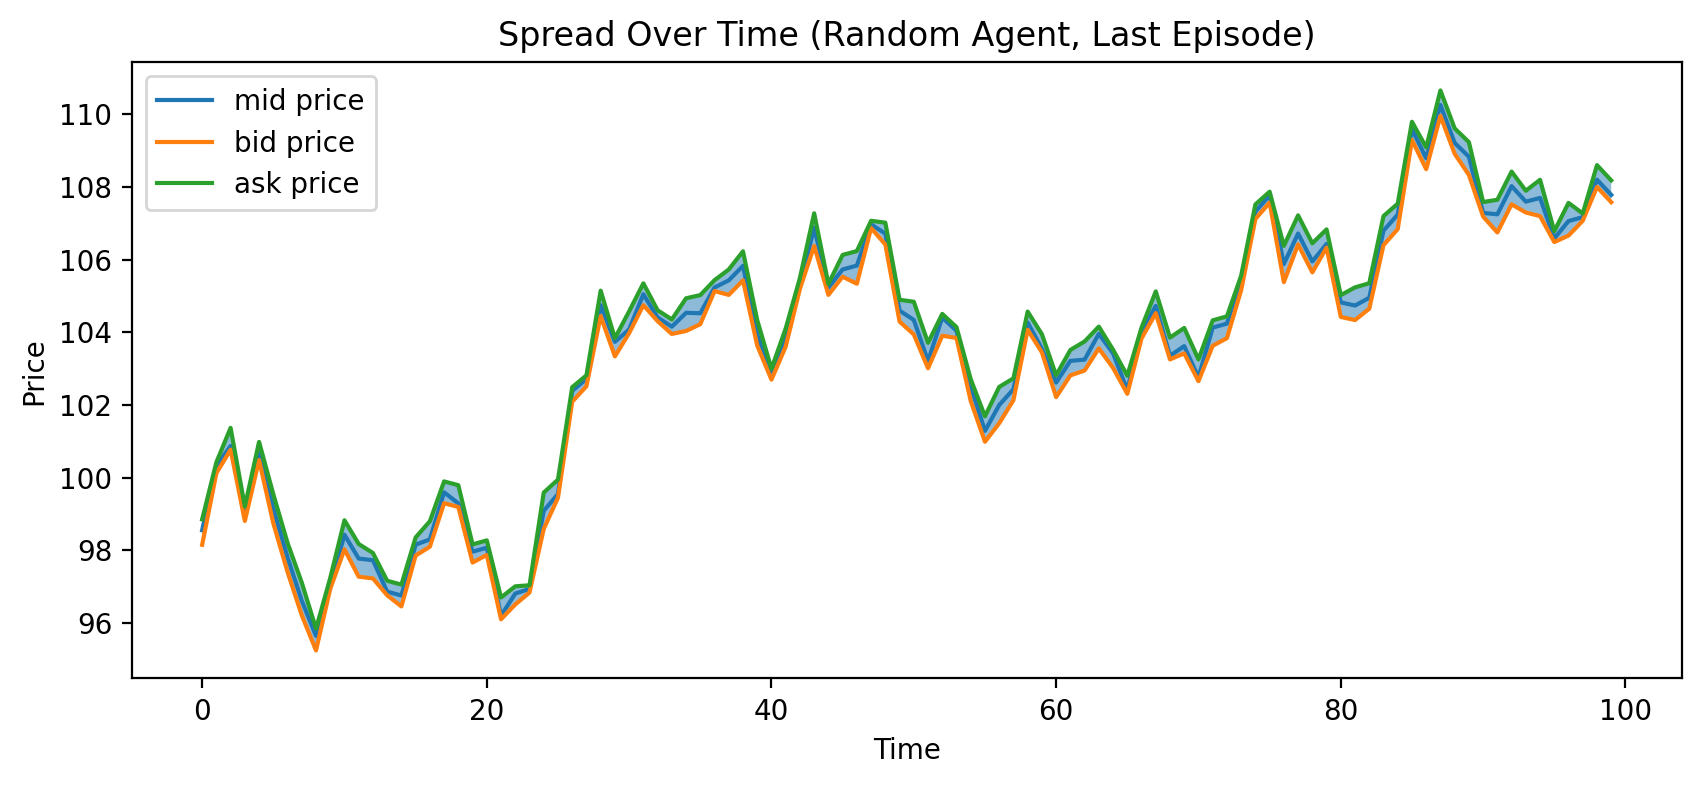

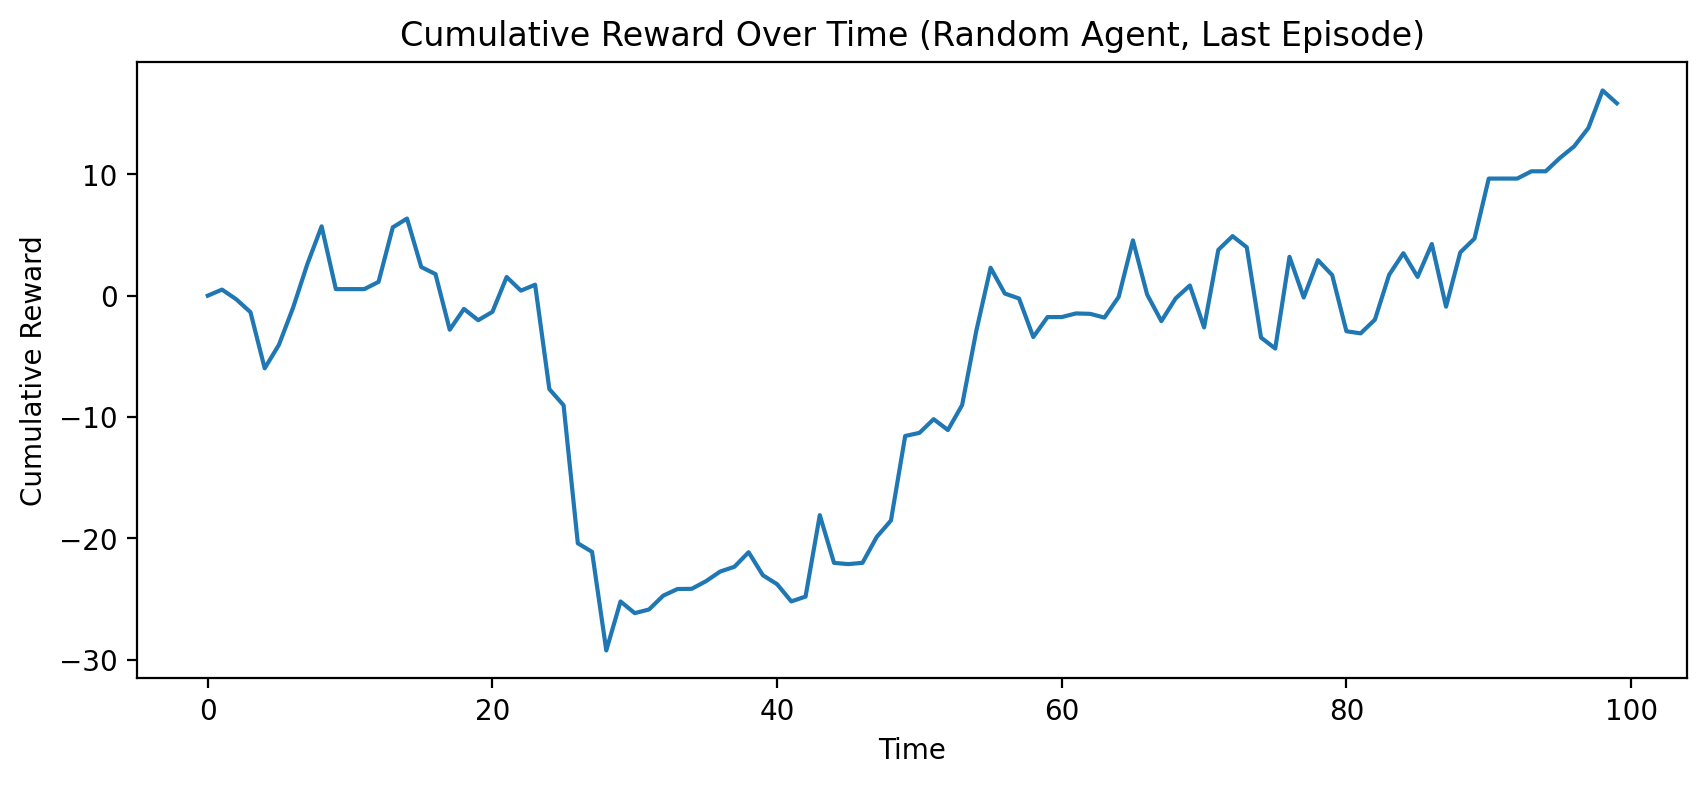

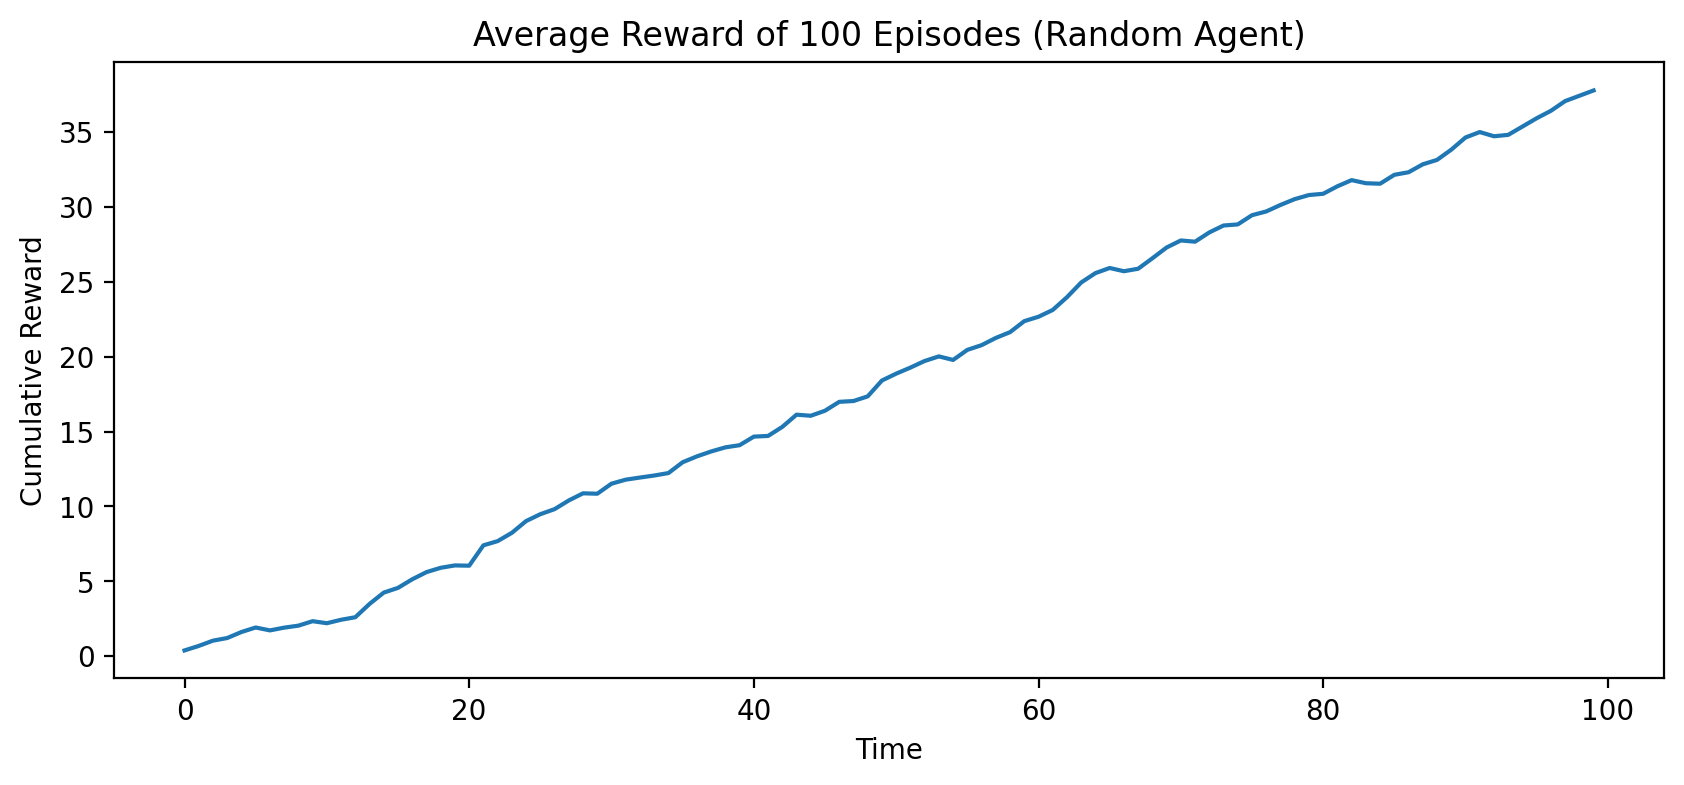

In [21]:
agent_random = RandomAgent(env_d=env.d)
logs_random, final_rewards_random, average_rewards_random = multiple_experiment(
    agent_name='Random Agent', agent=agent_random, env=env, num_episodes=100, 
    show_each=False, show_last=True, show_average=True)

### Q Learning

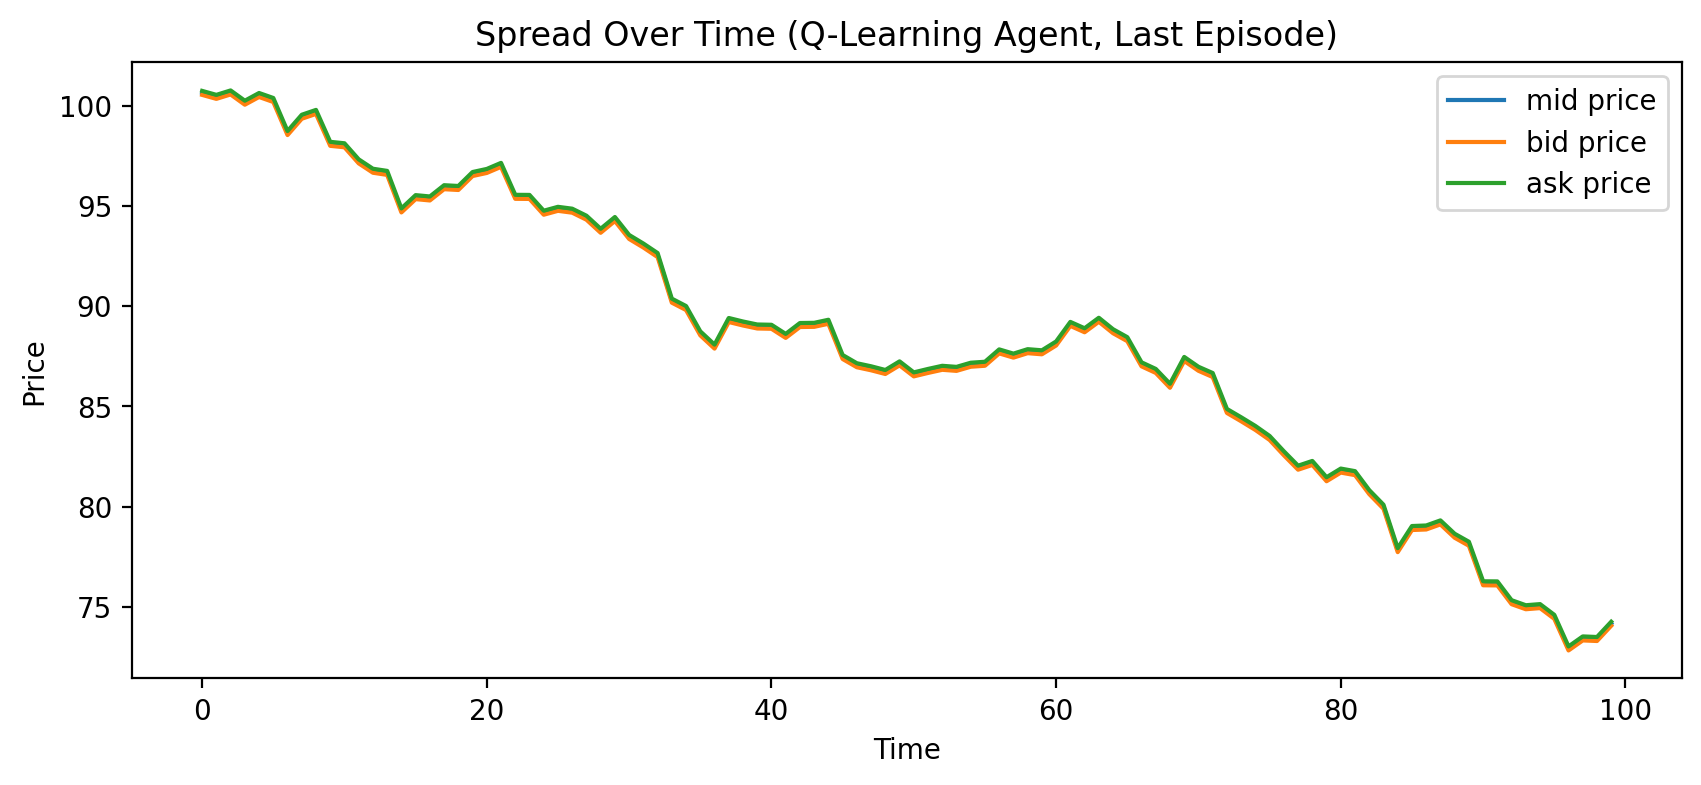

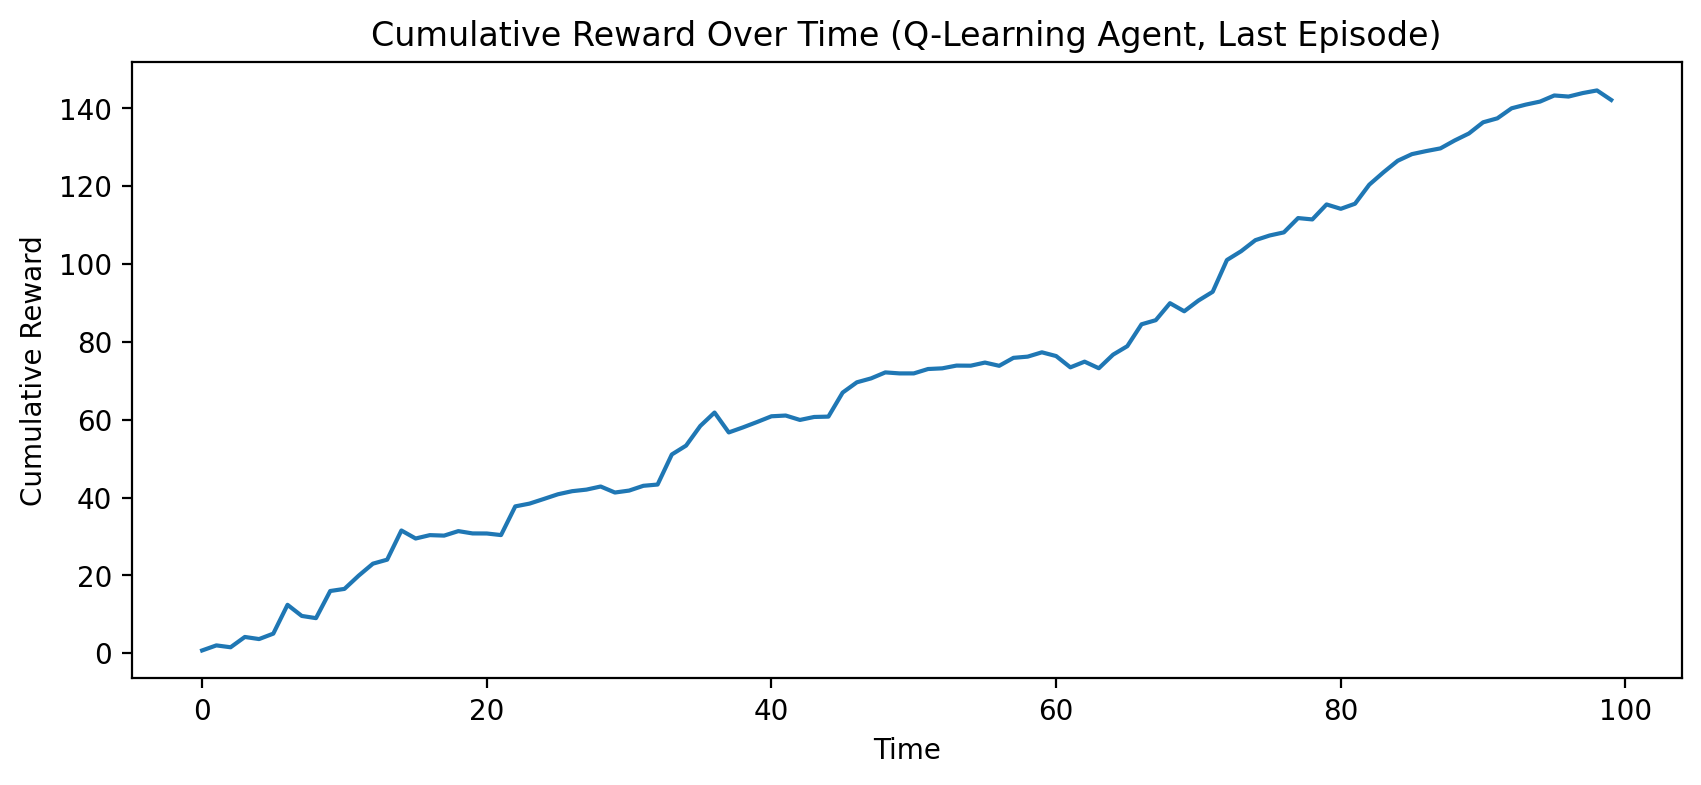

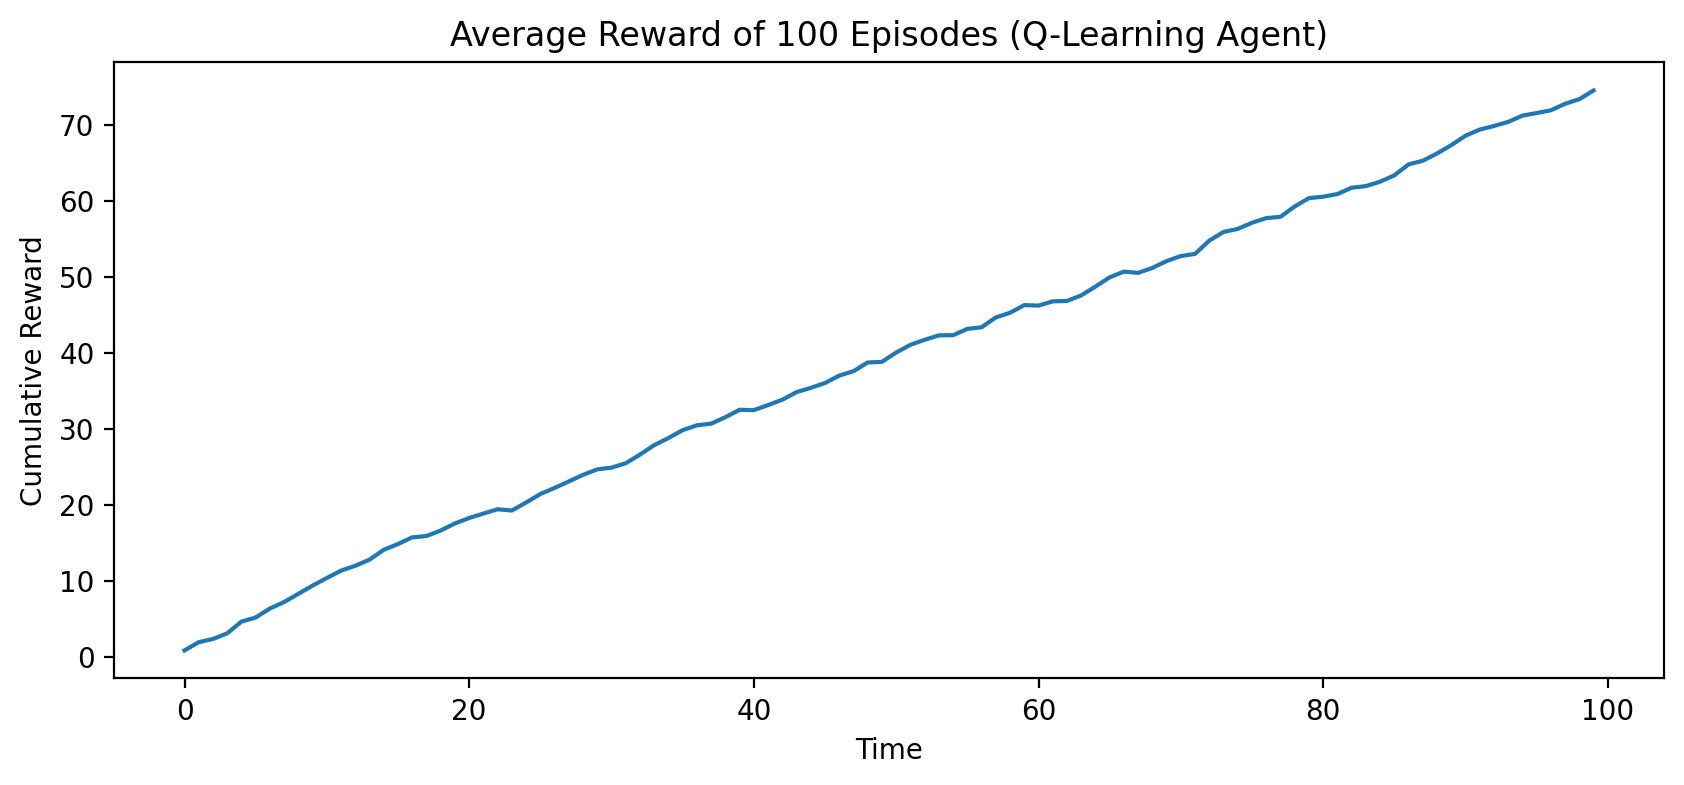

In [22]:
agent_q = QAgent(env_d=env.d, env_Q=env.Q, env_T=env.T, 
                 epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.01)
logs_q, final_rewards_q, average_rewards_q = multiple_experiment(
    agent_name='Q-Learning Agent', agent=agent_q, env=env, num_episodes=100, 
    show_each=False, show_last=True, show_average=True)

### Explore First Agent

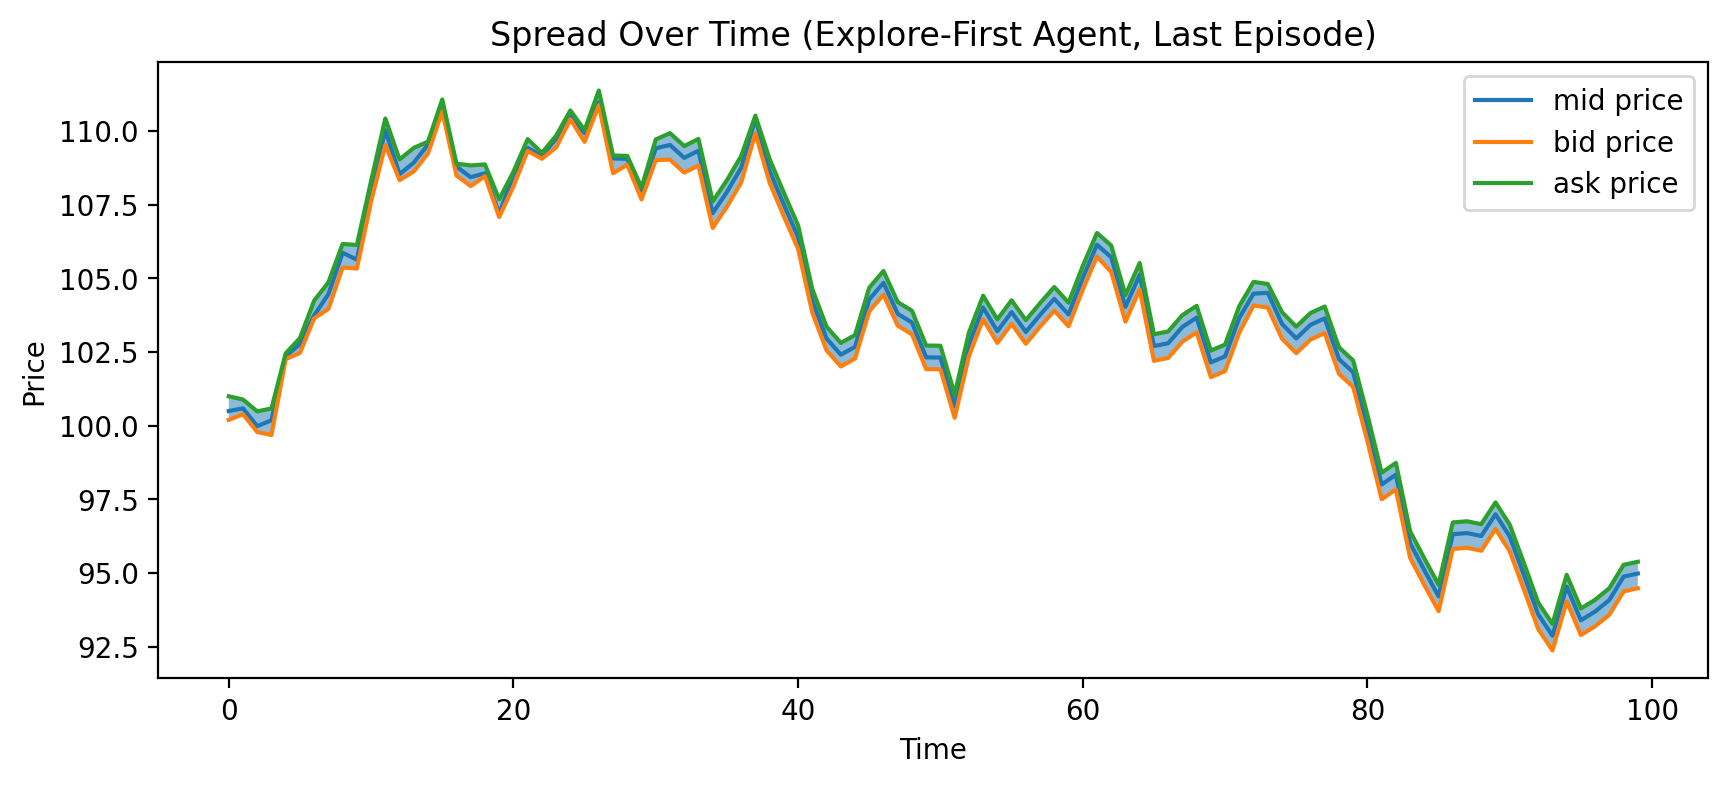

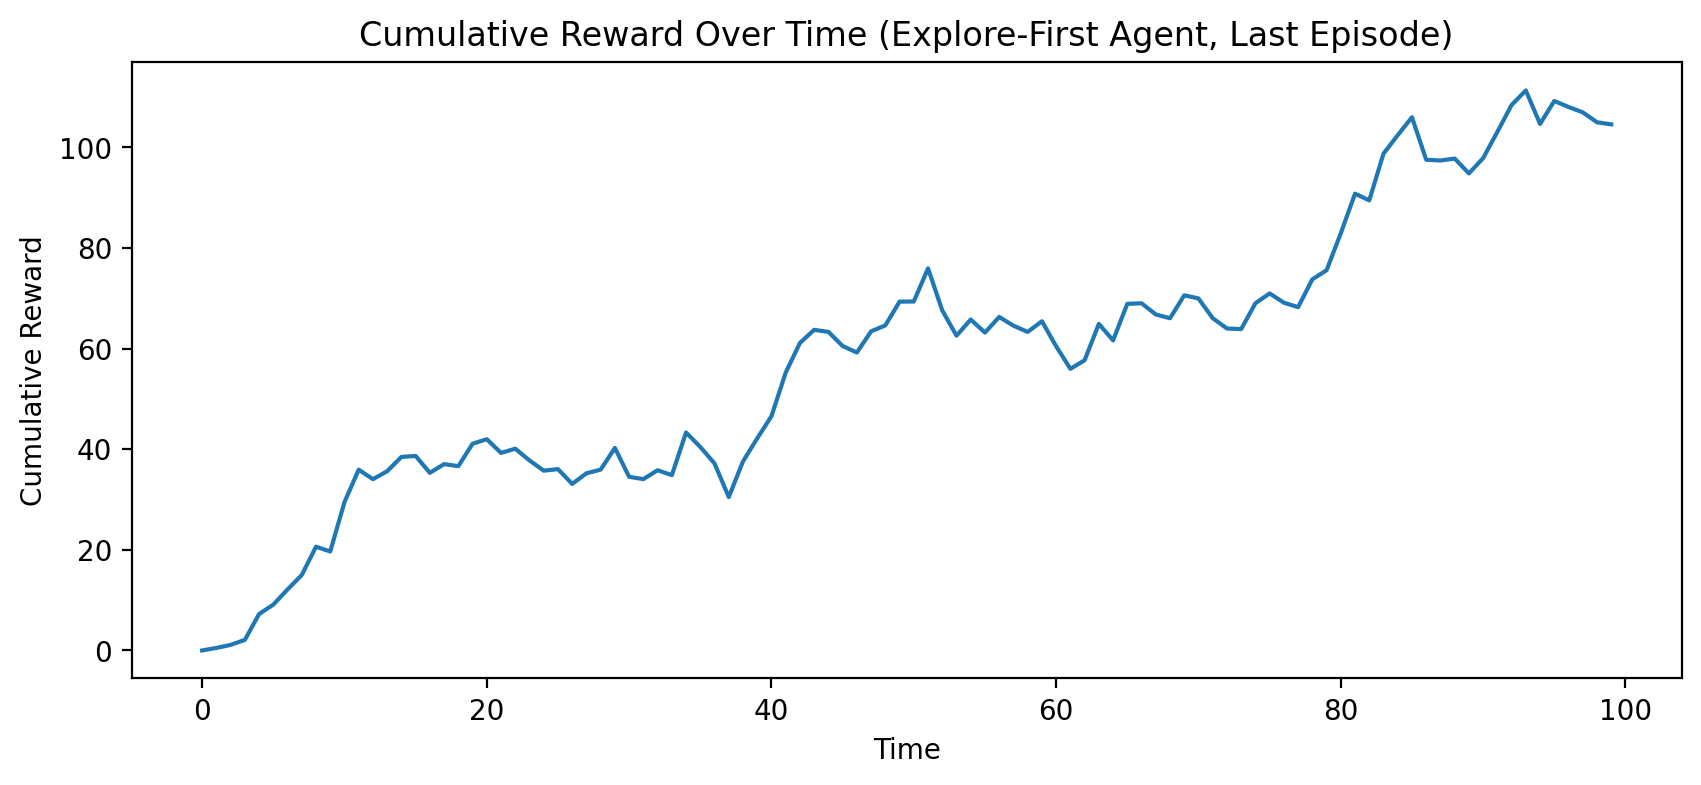

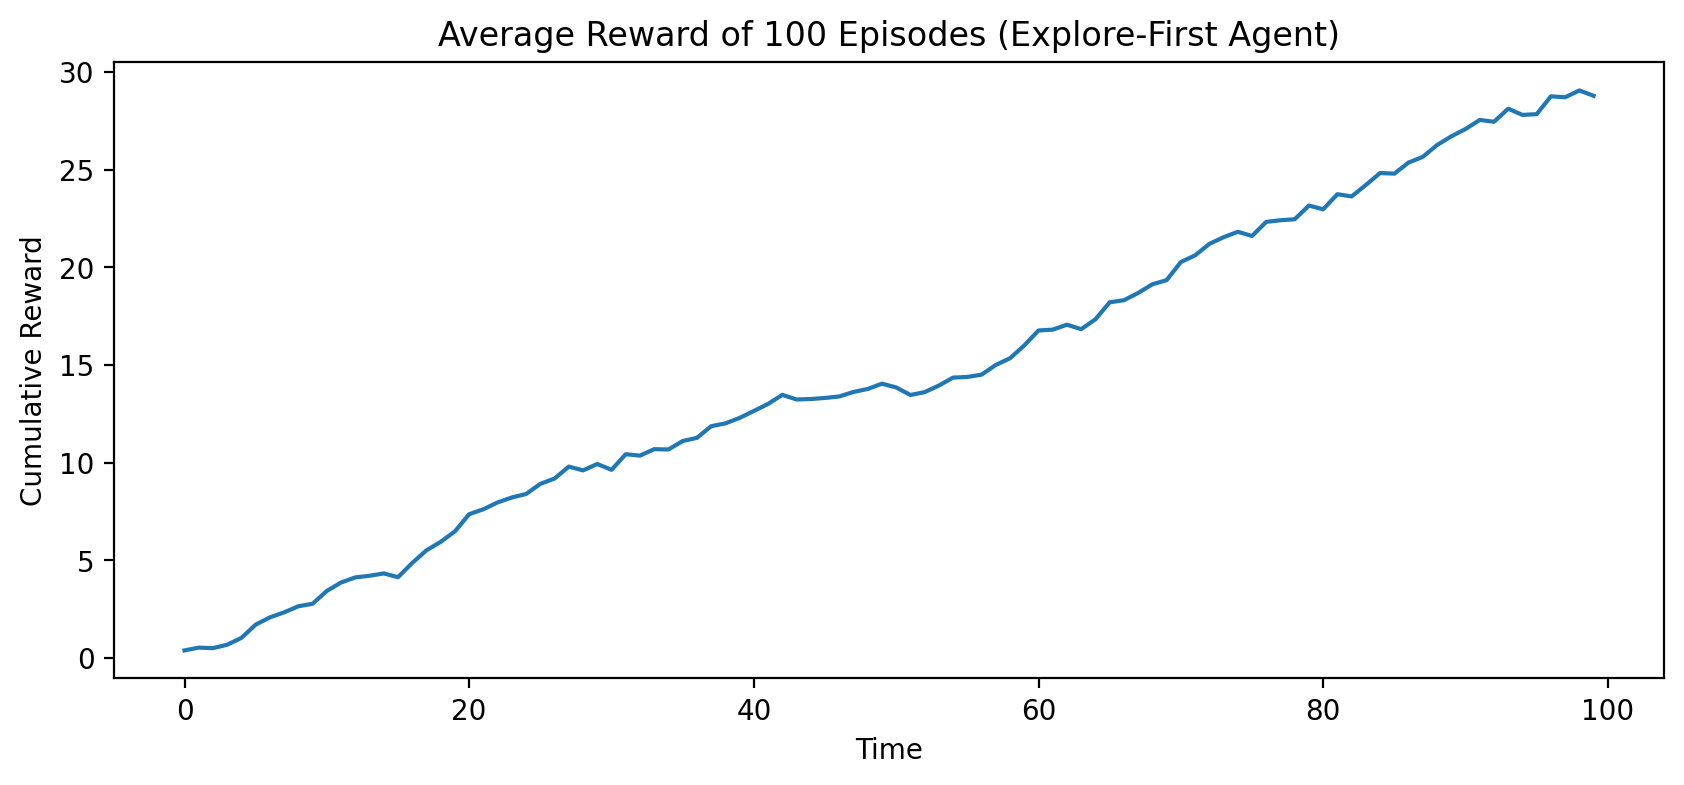

In [23]:
agent_explorefirst = ExploreFirstAgent(num_actions_bid=env.d, num_actions_ask=env.d, max_explore=30)
logs_ef, final_rewards_ef, average_rewards_ef = multiple_experiment(
    agent_name='Explore-First Agent', agent=agent_explorefirst, env=env, num_episodes=100, 
    show_each=False, show_last=True, show_average=True)

### UCB Agent

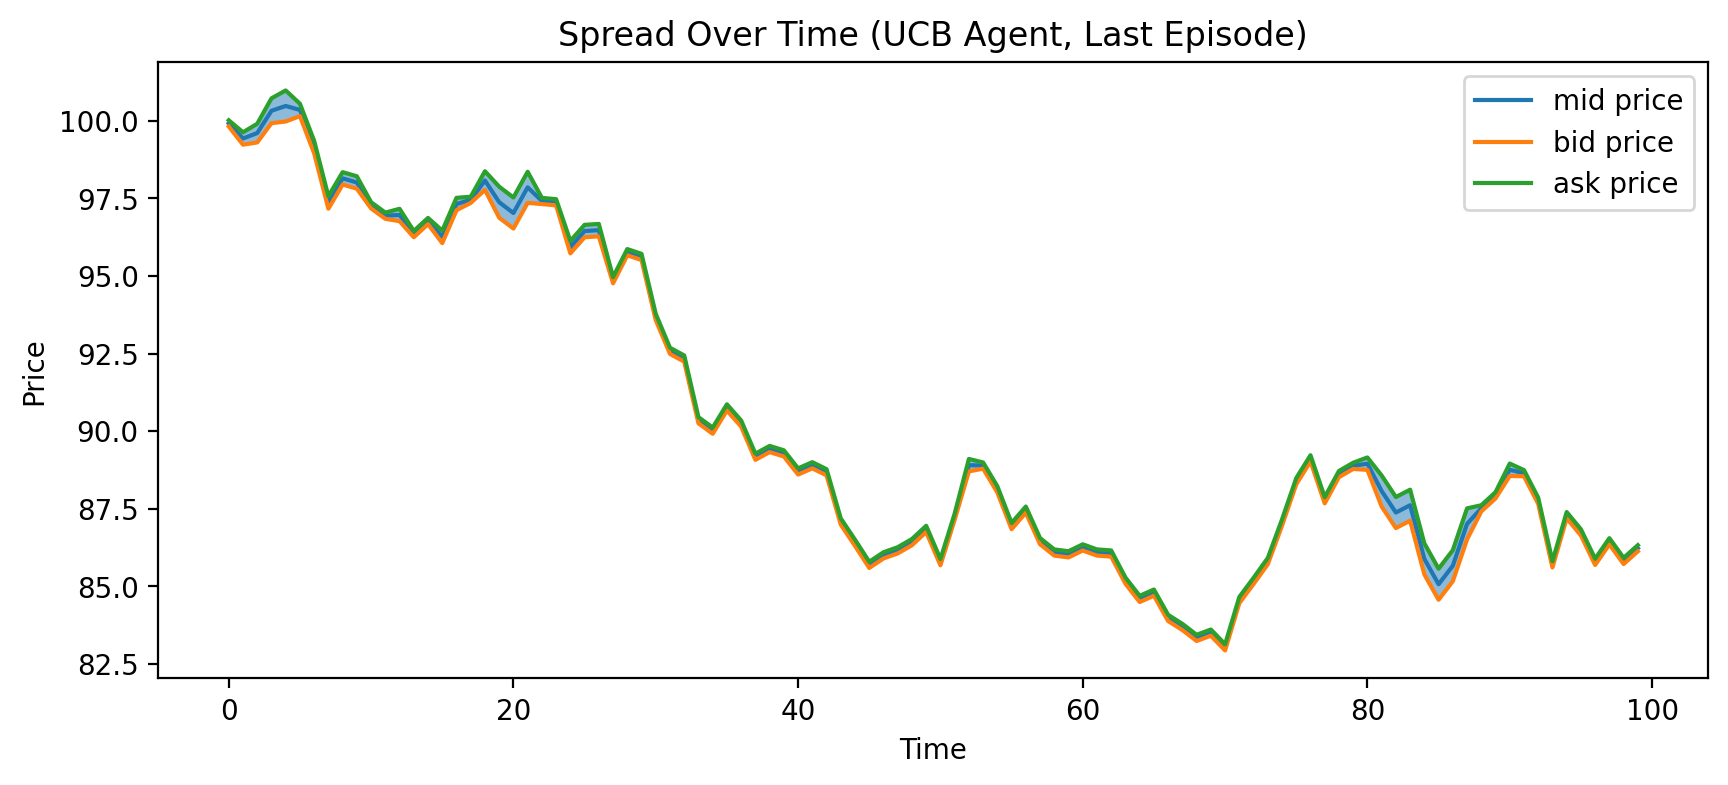

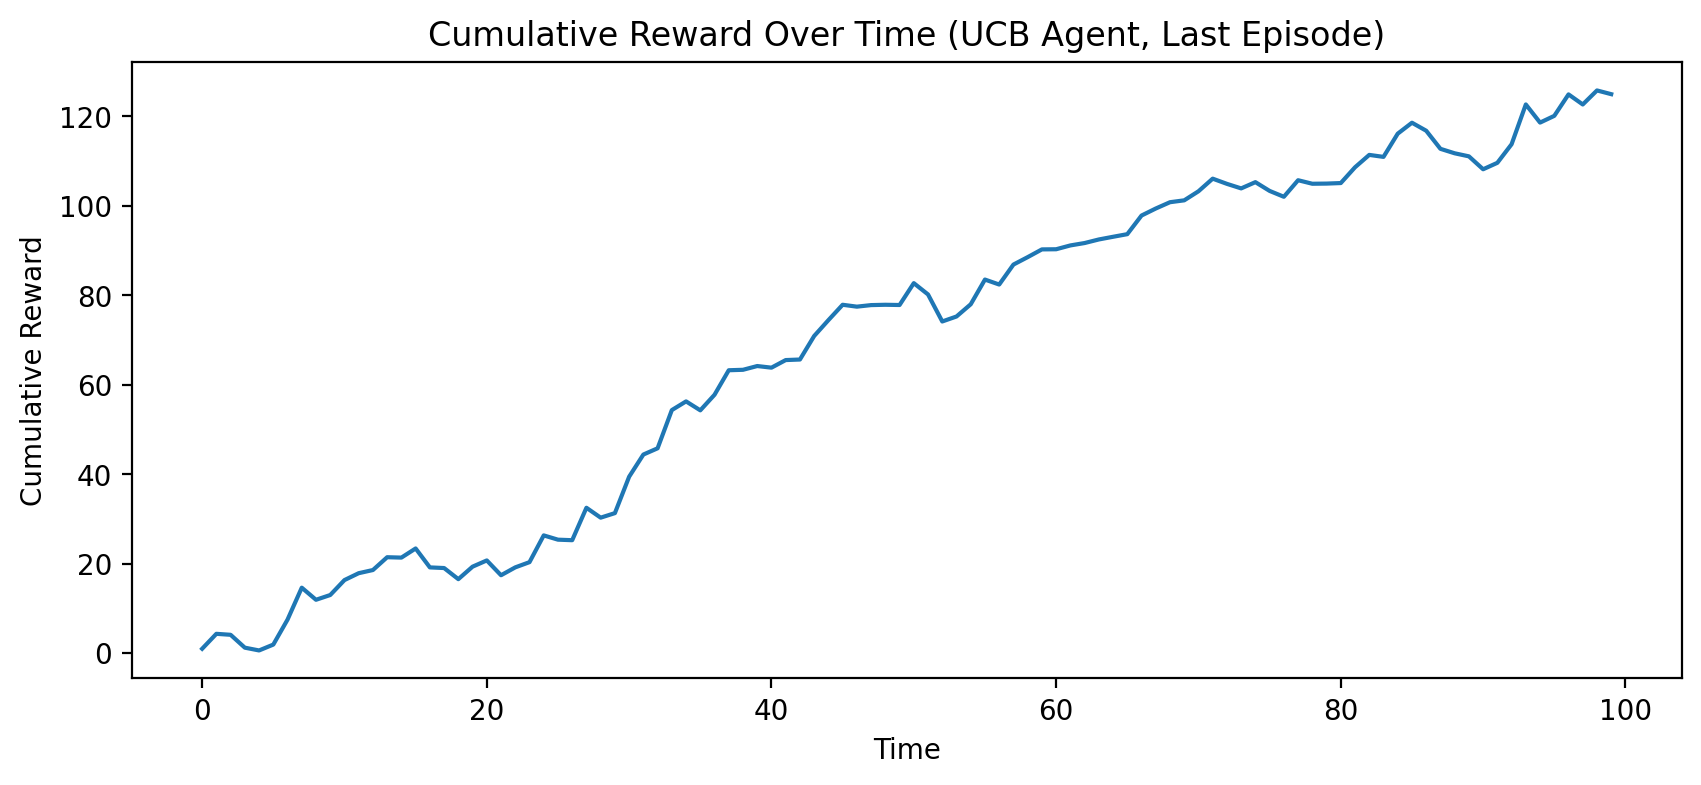

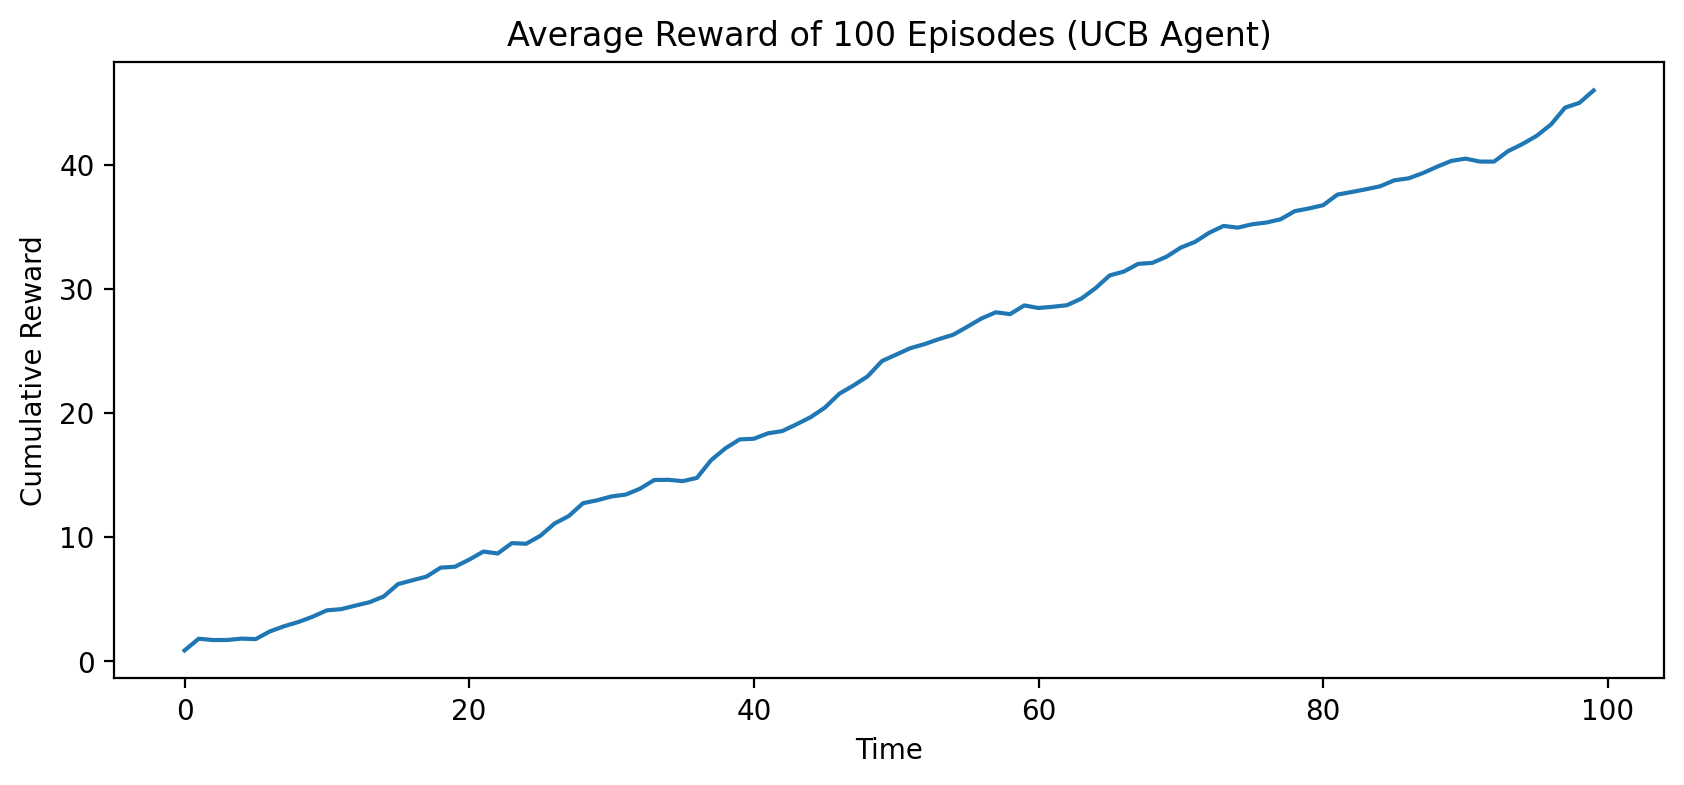

In [24]:
agent_ucb = UCBAgent(num_actions_bid=env.d, num_actions_ask=env.d)
logs_ucb, final_rewards_ucb, average_rewards_ucb = multiple_experiment(
    agent_name='UCB Agent', agent=agent_ucb, env=env, num_episodes=100, 
    show_each=False, show_last=True, show_average=True)

### Epsilon-Greedy Agent

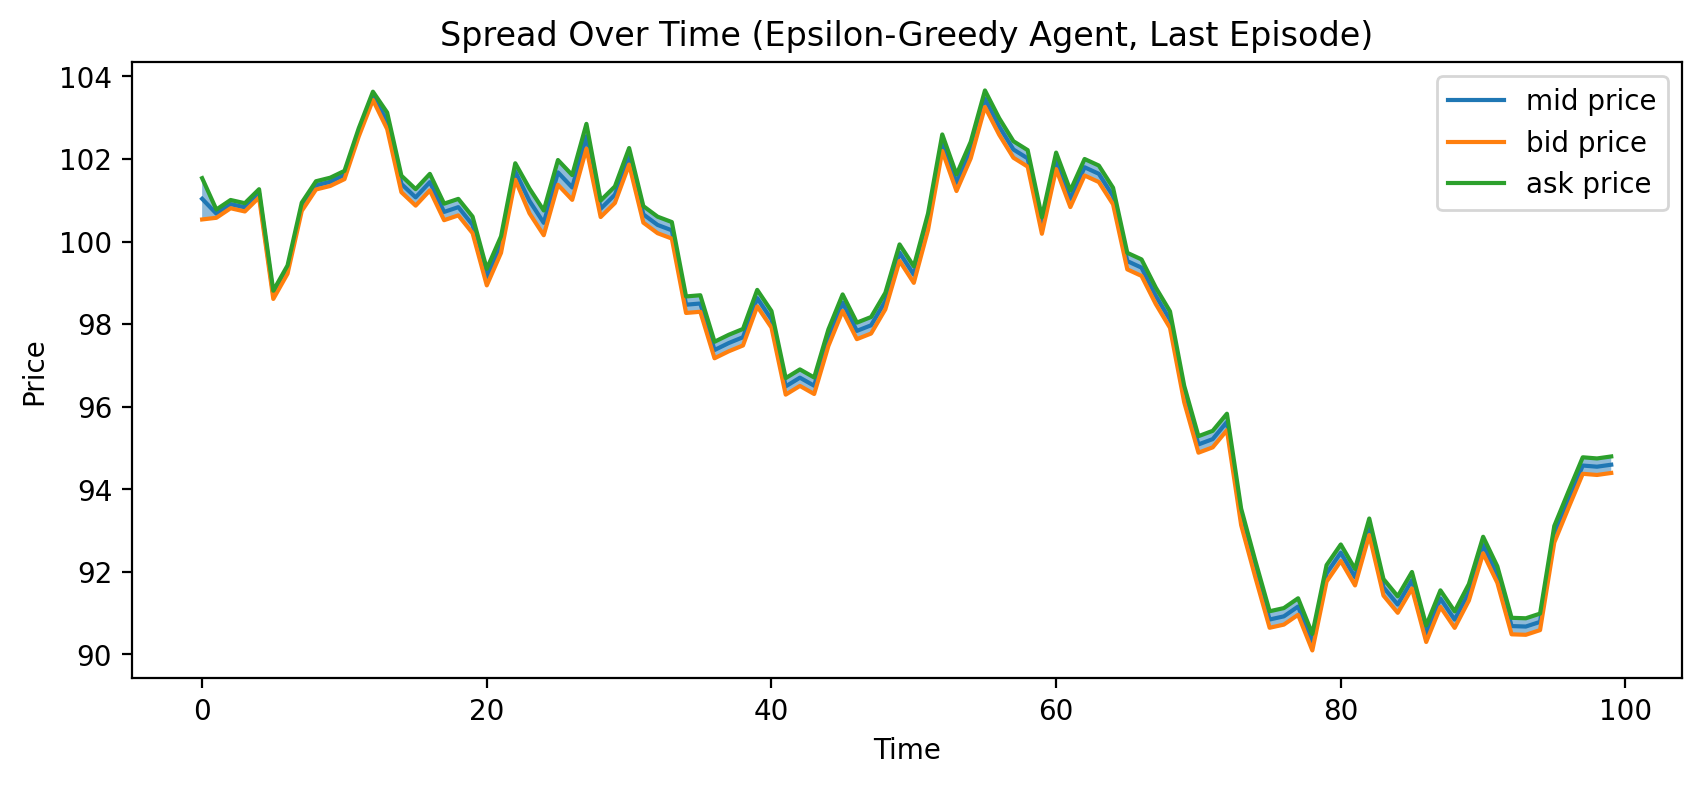

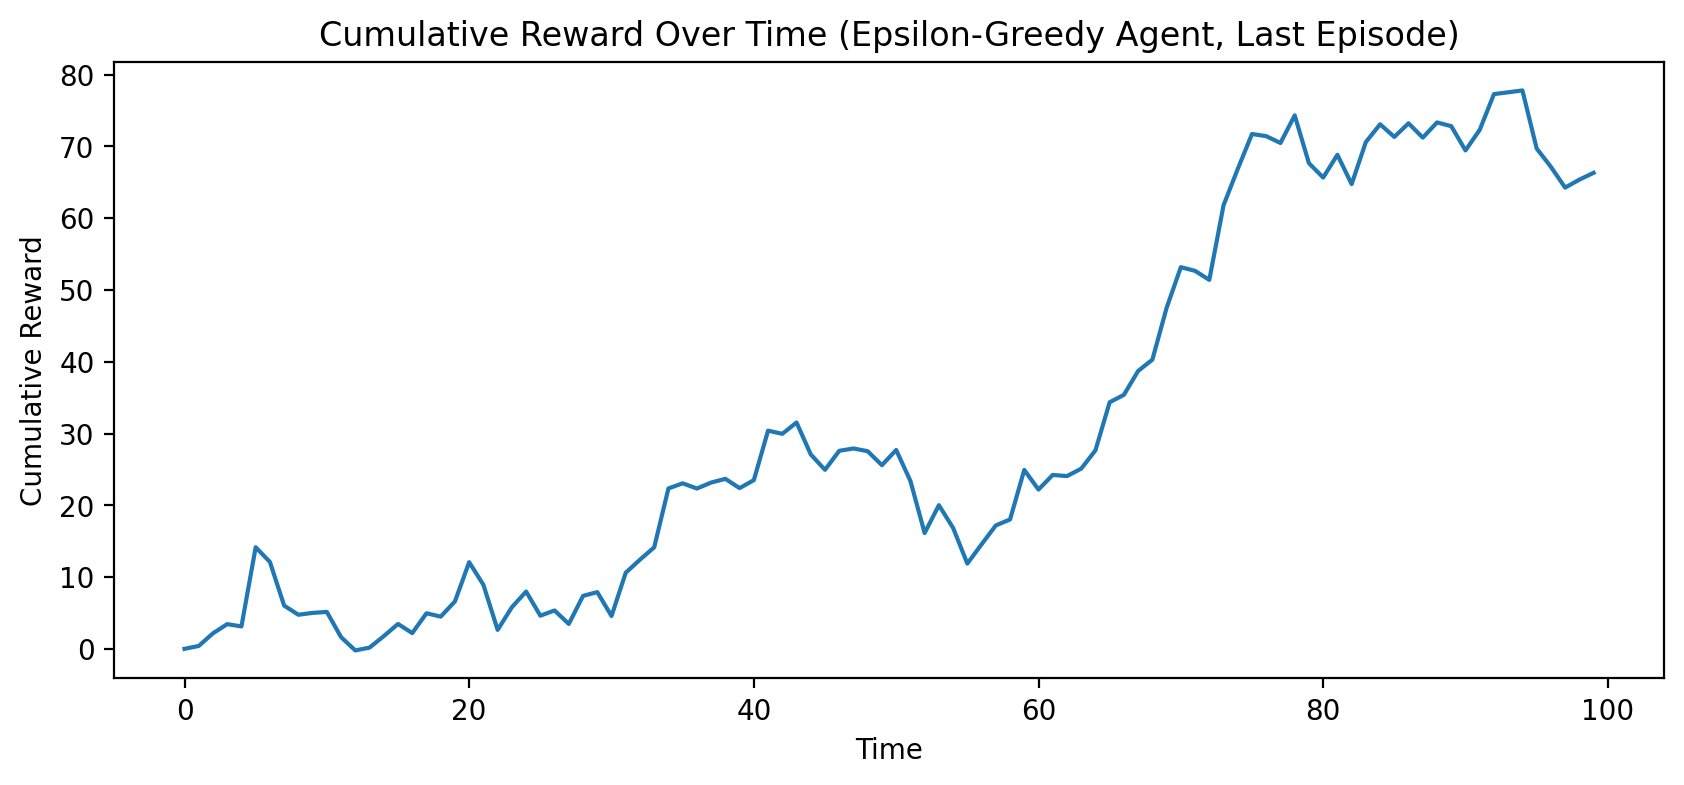

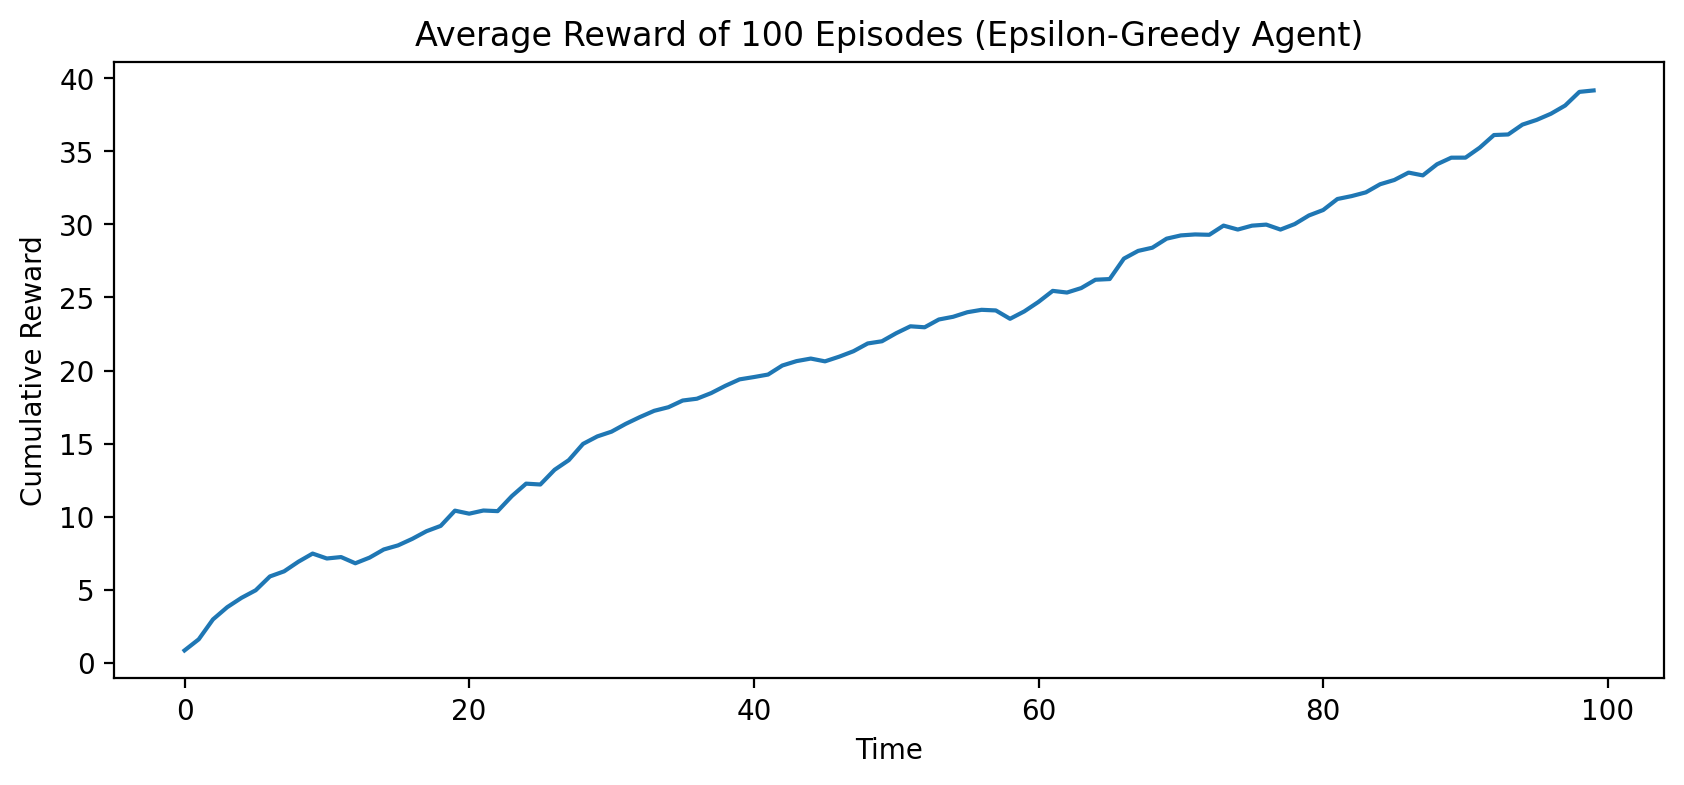

In [25]:
agent_epsilongreedy = EpsilonGreedyAgent(num_actions_bid=env.d, num_actions_ask=env.d, epsilon=0.1)
logs_eg, final_rewards_eg, average_rewards_eg = multiple_experiment(
    agent_name='Epsilon-Greedy Agent', agent=agent_epsilongreedy, env=env, num_episodes=100, 
    show_each=False, show_last=True, show_average=True)

### Decay-Epsilon-Greedy Agent

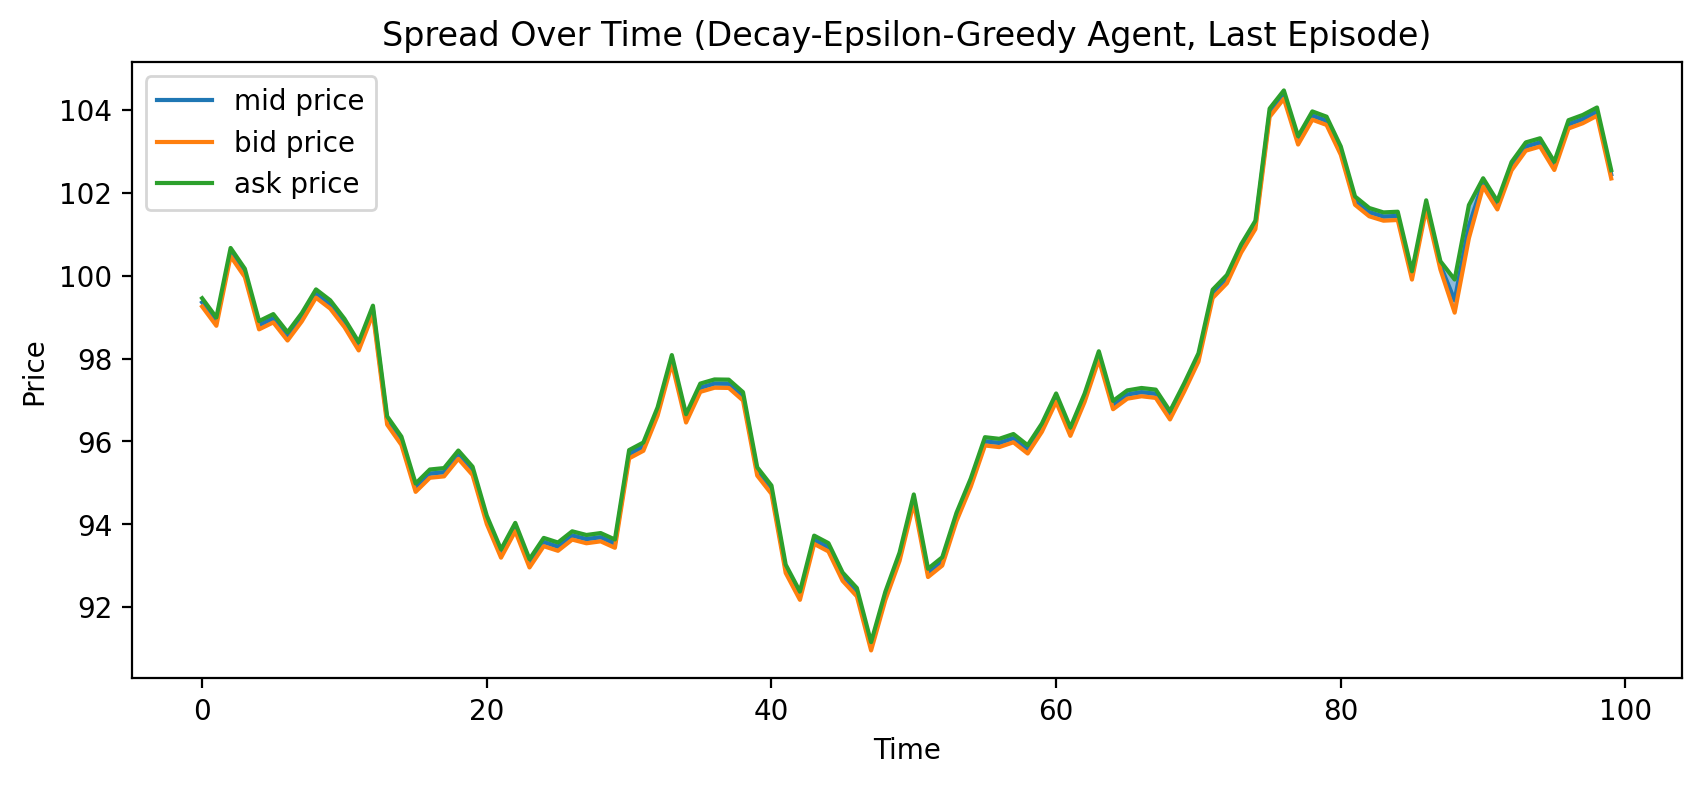

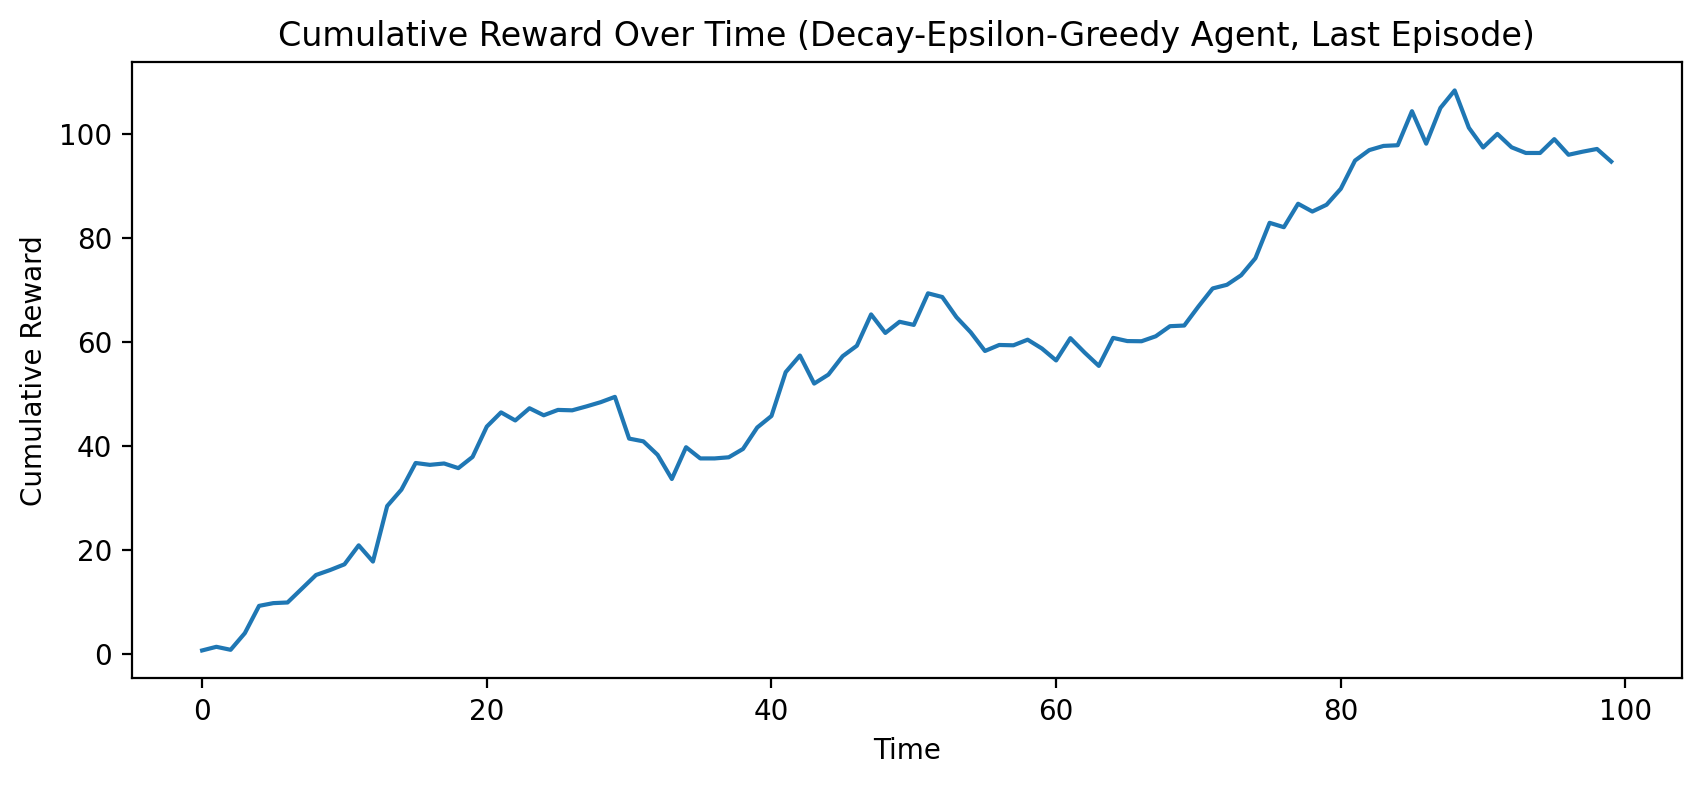

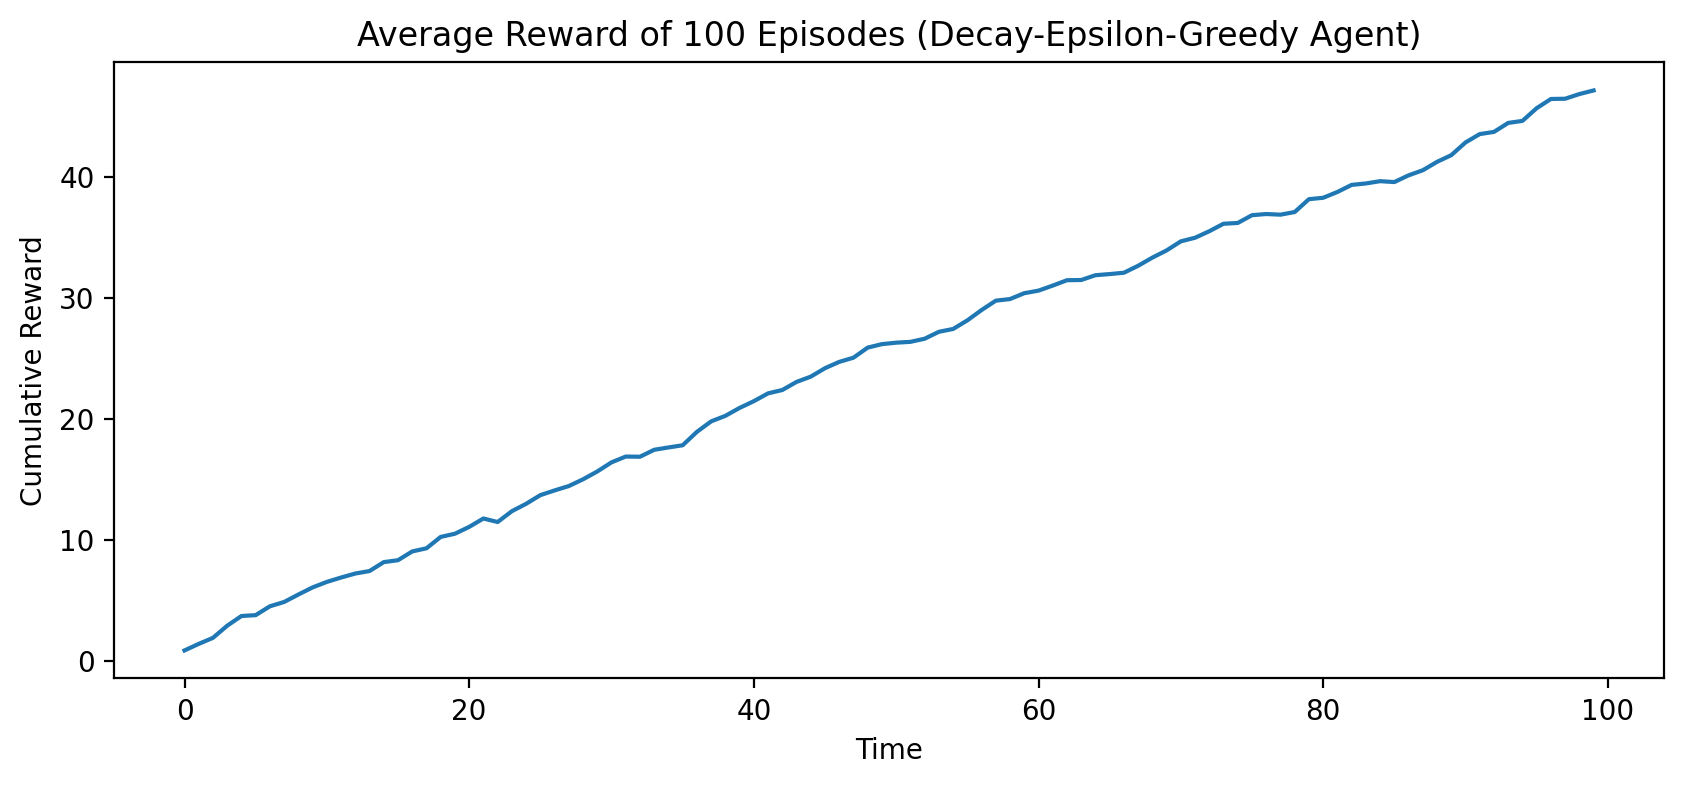

In [26]:
agent_decayepsilongreedy = DecayEpsilonGreedyAgent(num_actions_bid=env.d, num_actions_ask=env.d, 
                                                   epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.01)
logs_deg, final_rewards_deg, average_rewards_deg = multiple_experiment(
    agent_name='Decay-Epsilon-Greedy Agent', agent=agent_decayepsilongreedy, env=env, num_episodes=100,
    show_each=False, show_last=True, show_average=True)

## Optimal

In [35]:
agent_optimal = OptimalAgent(env)

/opt/homebrew/lib/python3.11/site-packages/scipy/linalg/_matfuncs.py:378: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
/Users/megijaupi/Documents/MIT/fall2022/optimalMM/mm_env.py:275: RuntimeWarning: invalid value encountered in scalar add
  delta_neg = 1 / self.kappa - h[self.Q_t + self.Q + 1] + h[self.Q_t + self.Q]
/Users/megijaupi/Documents/MIT/fall2022/optimalMM/mm_env.py:269: RuntimeWarning: overflow encountered in matmul
  omega = np.matmul(expm(self.A * (self.T - self.t)), self.z)
/Users/megijaupi/Documents/MIT/fall2022/optimalMM/mm_env.py:273: RuntimeWarning: invalid value encountered in scalar add
  delta_pos = 1 / self.kappa - h[self.Q_t + self.Q - 1] + h[self.Q_t + self.Q]


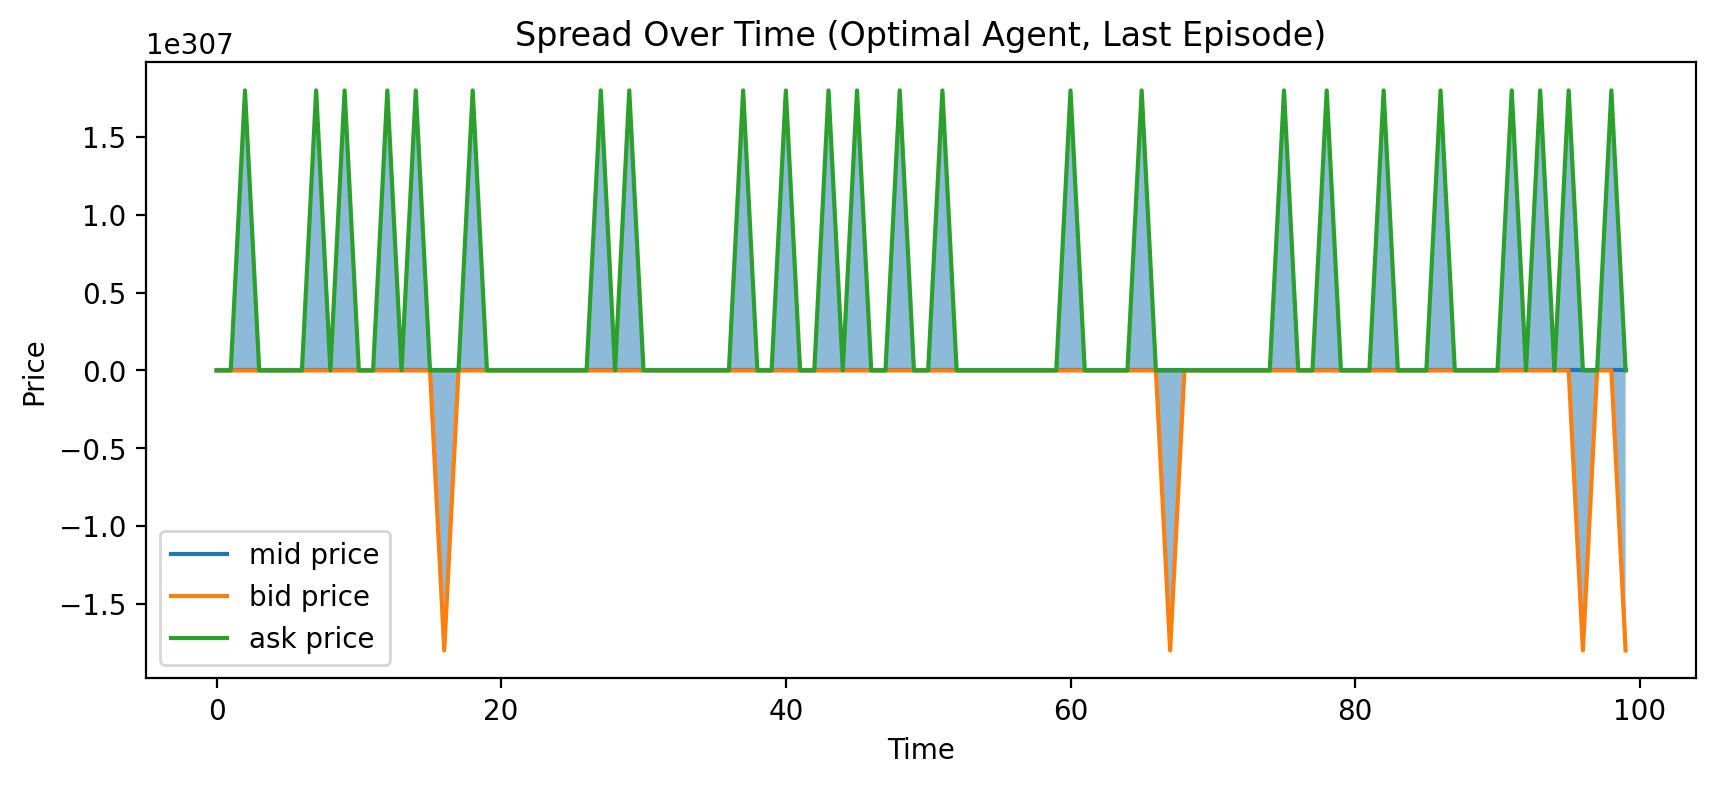

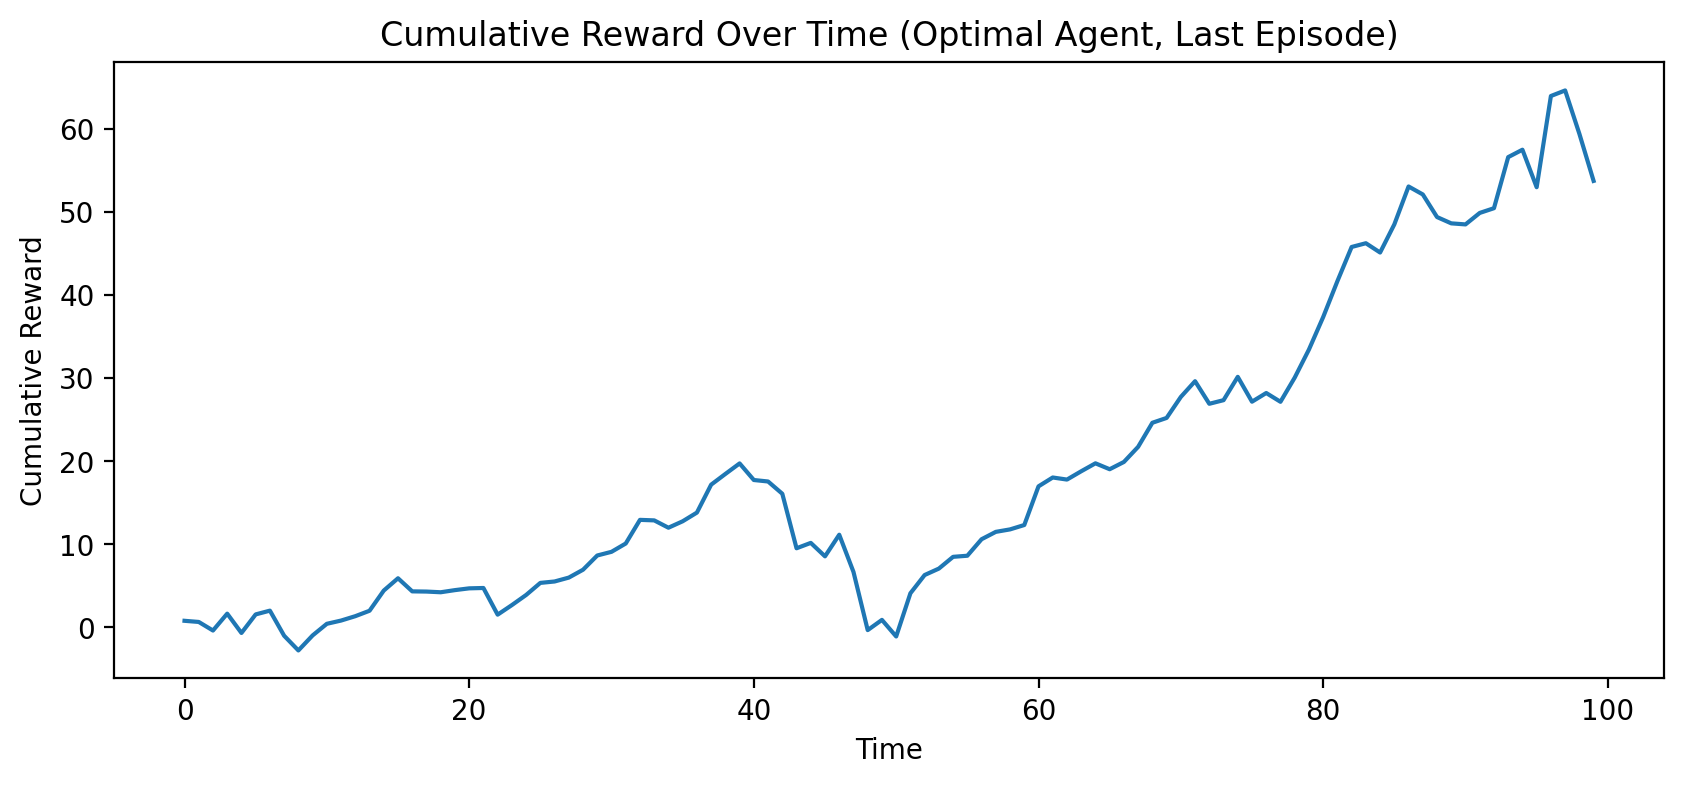

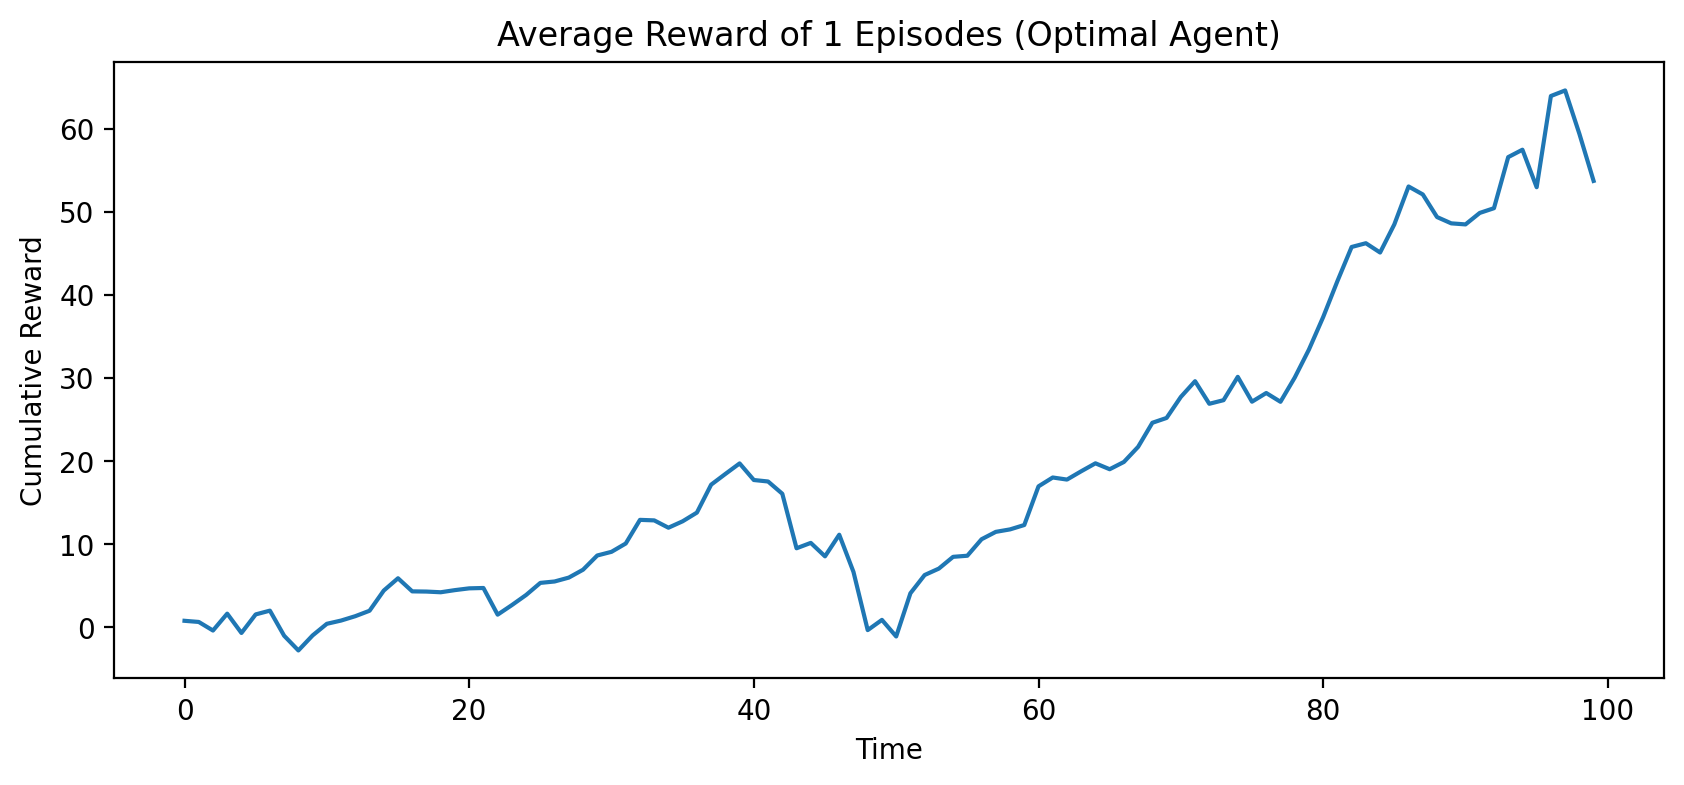

In [36]:
logs_opt, final_rewards_opt, average_rewards_opt = multiple_experiment(
    agent_name='Optimal Agent', agent=agent_optimal, env=env, num_episodes=1,
    show_each=False, show_last=True, show_average=True)

### Evaluate

In [40]:
final_rewards = {
    'Random Agent': final_rewards_random,
    'Q-Learning Agent': final_rewards_q,
    'Explore-First Agent': final_rewards_ef,
    'UCB Agent': final_rewards_ucb,
    'Epsilon-Greedy Agent': final_rewards_eg,
    'Decay-Epsilon-Greedy Agent': final_rewards_deg,
    #'Optimal Agent': final_rewards_opt
}
average_rewards = {
    'Random Agent': average_rewards_random,
    'Q-Learning Agent': average_rewards_q,
    'Explore-First Agent': average_rewards_ef,
    'UCB Agent': average_rewards_ucb,
    'Epsilon-Greedy Agent': average_rewards_eg,
    'Decay-Epsilon-Greedy Agent': average_rewards_deg,
    #'Optimal Agent': average_rewards_opt
}

In [41]:
final_rewards_df = pd.DataFrame(final_rewards).describe()
final_rewards_df

,Random Agent,Q-Learning Agent,Explore-First Agent,UCB Agent,Epsilon-Greedy Agent,Decay-Epsilon-Greedy Agent
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,37.775562,74.572742,28.780643,45.997719,39.174808,47.135789
std,31.585721,33.660820,34.288179,36.510202,39.814542,43.010527
min,-34.743466,-8.566580,-72.793479,-40.162171,-58.681961,-60.362863
25%,16.512650,54.136543,5.717607,23.333885,7.932091,17.505545
50%,37.991720,72.799781,28.436187,45.102160,46.274502,44.215157
75%,58.720278,93.059496,50.805836,67.574887,66.555634,73.555170
max,112.143044,154.547889,124.382581,138.988391,119.607185,141.545711


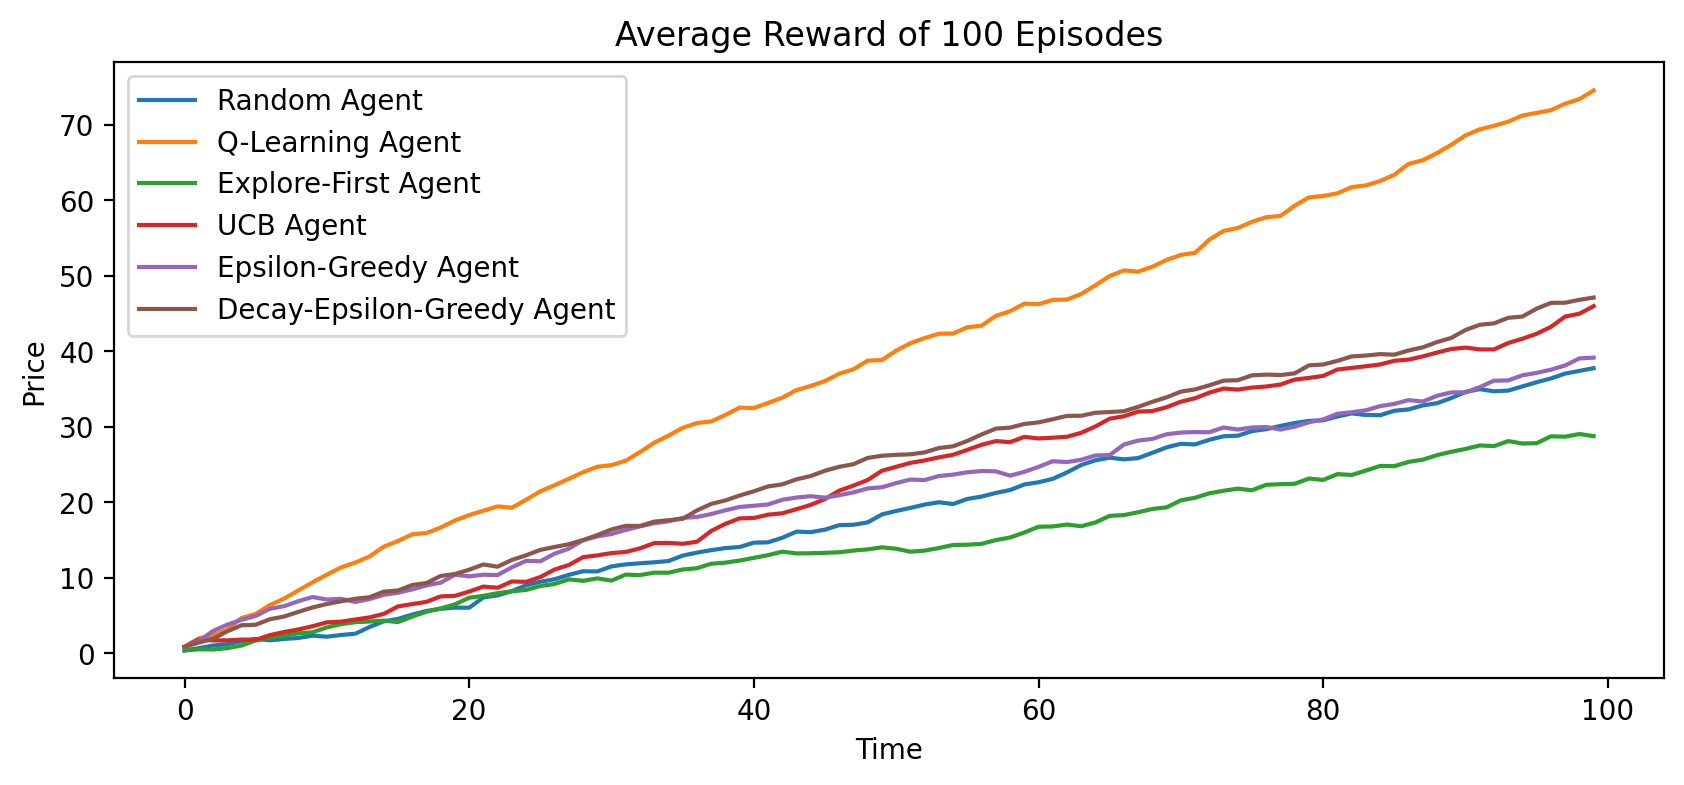

In [42]:
plt.figure(figsize=(10,4), dpi=200)
for agent, avg_reward in average_rewards.items():
    plt.plot(avg_reward, label=agent)
plt.legend()
plt.title(f'Average Reward of 100 Episodes')
plt.ylabel('Price')
plt.xlabel('Time')
plt.show()